In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
BAN_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_CP.csv')
BAN_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_ADNI.csv')
BAN_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_CogConVar.csv')
BAN_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_NCN.csv')

DBN_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_CP.csv')
DBN_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_ADNI.csv')
DBN_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_CogConVar.csv')
DBN_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_NCN.csv')

pyment_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_CP.csv')
pyment_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_ADNI.csv')
pyment_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_CogConVar.csv')
pyment_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_NCN.csv')

ENIGMA_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_CP.csv')
ENIGMA_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_NCN= pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_NCN.csv')
#agregar el resto

BrainAgeNeXt:

In [57]:
#CP-----------------------------------------------------------------------
BAN_CP['mean']=BAN_CP['Edad']+BAN_CP['Predicted_Brain_Age']
BAN_CP['mean']=BAN_CP['mean']/2


mean_diff_BANCP=np.mean(BAN_CP['Error'])
std_diff_BANCP=np.std(BAN_CP['Error'])

#intervalo de confianza del 95%
upper_limit_BANCP = mean_diff_BANCP + 1.96 * std_diff_BANCP
lower_limit_BANCP = mean_diff_BANCP - 1.96 * std_diff_BANCP

#ADNI CN-----------------------------------------------------------------------
BAN_ADNI['mean']=BAN_ADNI['Age']+BAN_ADNI['Predicted_Brain_Age']
BAN_ADNI['mean']=BAN_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_BANADNI=np.mean(BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'])
std_diff_control_BANADNI=np.std(BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_BANADNI = mean_diff_control_BANADNI + 1.96 * std_diff_control_BANADNI
lower_limit_control_BANADNI = mean_diff_control_BANADNI - 1.96 * std_diff_control_BANADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_BANADNI=np.mean(BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'])
std_diff_clinical_BANADNI=np.std(BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_BANADNI = mean_diff_clinical_BANADNI + 1.96 * std_diff_clinical_BANADNI
lower_limit_clinical_BANADNI = mean_diff_clinical_BANADNI - 1.96 * std_diff_clinical_BANADNI

#NCN-----------------------------------------------------------------------
BAN_NCN['mean']=BAN_NCN['age']+BAN_NCN['Predicted_Brain_Age']
BAN_NCN['mean']=BAN_NCN['mean']/2


mean_diff_BANNCN=np.mean(BAN_NCN['Error'])
std_diff_BANNCN=np.std(BAN_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_BANNCN = mean_diff_BANNCN + 1.96 * std_diff_BANNCN
lower_limit_BANNCN = mean_diff_BANNCN - 1.96 * std_diff_BANNCN

#CogConVar-----------------------------------------------------------------------
BAN_CogConVar['mean']=BAN_CogConVar['age']+BAN_CogConVar['Predicted_Brain_Age']
BAN_CogConVar['mean']=BAN_CogConVar['mean']/2

mean_diff_BANCogConVar=np.mean(BAN_CogConVar['Error'])
std_diff_BANCogConVar=np.std(BAN_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_BANCogConVar = mean_diff_BANCogConVar + 1.96 * std_diff_BANCogConVar
lower_limit_BANCogConVar = mean_diff_BANCogConVar - 1.96 * std_diff_BANCogConVar

In [58]:
# Eliminar nulos
BAN_CP = BAN_CP.dropna(subset=['Error', 'mean'])
BAN_ADNI = BAN_ADNI.dropna(subset=['Error', 'mean'])
BAN_NCN = BAN_NCN.dropna(subset=['Error', 'mean'])
BAN_CogConVar = BAN_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión BAN_CP
slope_BANCP, intercept_BANCP = np.polyfit(BAN_CP['mean'], BAN_CP['Error'], 1)
tendencia_BANCP = slope_BANCP * BAN_CP['mean'] + intercept_BANCP

# Regressión BAN_ADNICN
slope_BANADNICN, intercept_BANADNICN = np.polyfit(BAN_ADNI[BAN_ADNI['Group']=='CN']['mean'], BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'], 1)
tendencia_BANADNICN = slope_BANADNICN * BAN_ADNI[BAN_ADNI['Group']=='CN']['mean'] + intercept_BANADNICN

# Regressión BAN_ADNIcli
slope_BANADNIcli, intercept_BANADNIcli = np.polyfit(BAN_ADNI[BAN_ADNI['Group']!='CN']['mean'], BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'], 1)
tendencia_BANADNIcli = slope_BANADNIcli * BAN_ADNI[BAN_ADNI['Group']!='CN']['mean'] + intercept_BANADNIcli

# Regressión BAN_NCN
slope_BANNCN, intercept_BANNCN = np.polyfit(BAN_NCN['mean'], BAN_NCN['Error'], 1)
tendencia_BANNCN = slope_BANNCN * BAN_NCN['mean'] + intercept_BANNCN

# Regressión BAN_CogConVar
slope_BANCogConVar, intercept_BANCogConVar = np.polyfit(BAN_CogConVar['mean'], BAN_CogConVar['Error'], 1)
tendencia_BANCogConVar = slope_BANCogConVar * BAN_CogConVar['mean'] + intercept_BANCogConVar


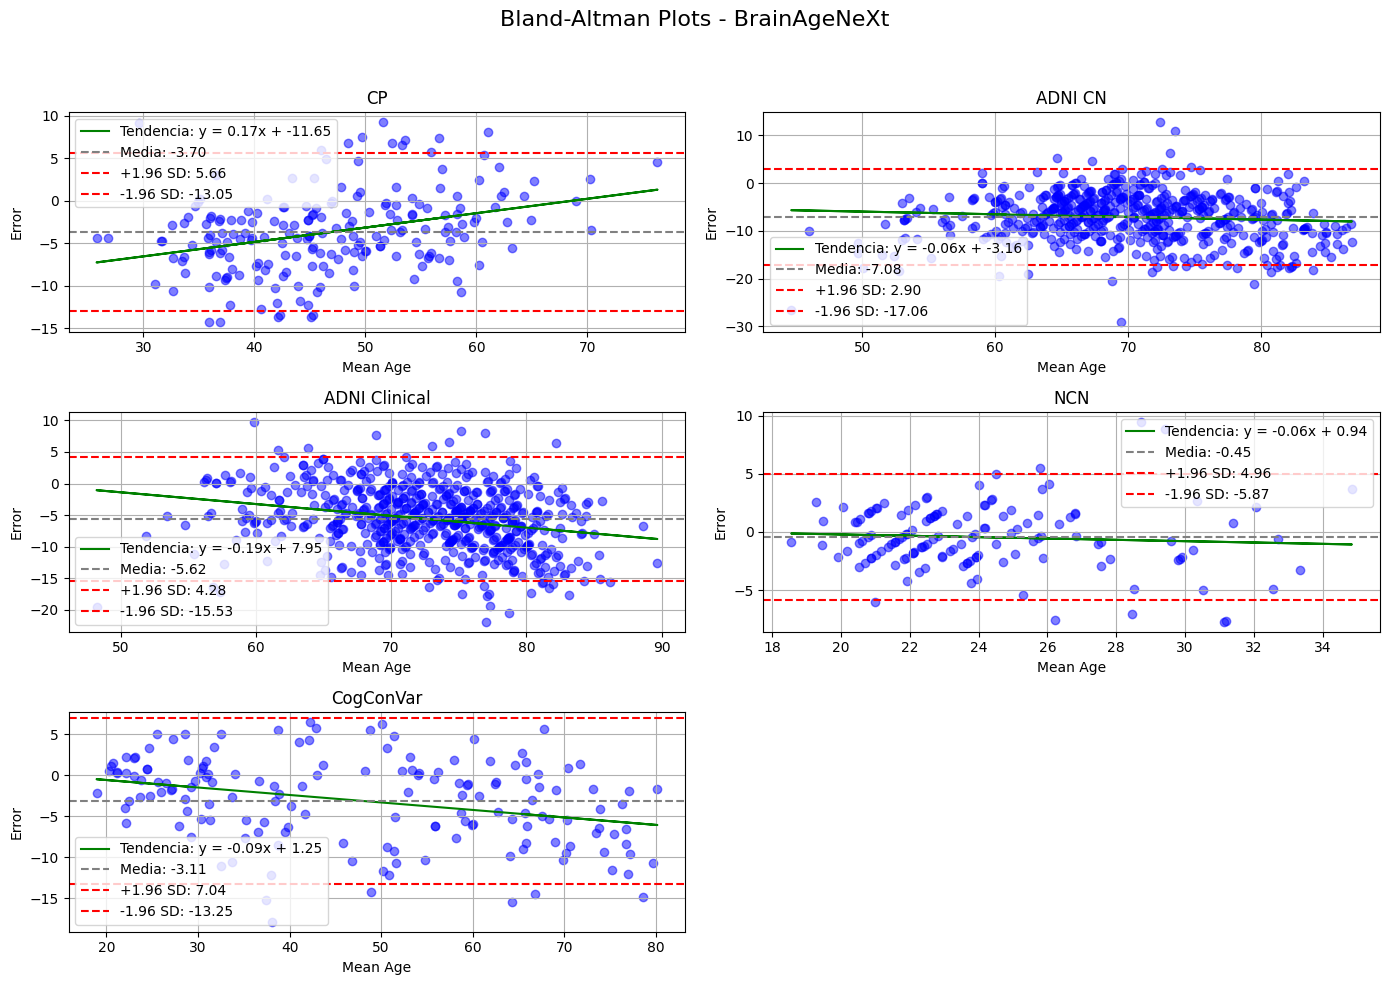

In [59]:
# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Bland-Altman Plots - BrainAgeNeXt', fontsize=16)

# --- Plot BAN_CP ---
axes[0][0].scatter(BAN_CP['mean'], BAN_CP['Error'], color='blue', alpha=0.5)
axes[0][0].plot(BAN_CP['mean'], tendencia_BANCP, color='green', linestyle='-', label=f'Tendencia: y = {slope_BANCP:.2f}x + {intercept_BANCP:.2f}')
axes[0][0].axhline(mean_diff_BANCP, color='gray', linestyle='--', label=f'Media: {mean_diff_BANCP:.2f}')
axes[0][0].axhline(upper_limit_BANCP, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_BANCP:.2f}')
axes[0][0].axhline(lower_limit_BANCP, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_BANCP:.2f}')
axes[0][0].set_title('CP')
axes[0][0].set_xlabel('Mean Age')
axes[0][0].set_ylabel('Error')
axes[0][0].legend()
axes[0][0].grid(True)

# --- Plot BAN_ADNI CN ---
axes[0][1].scatter(BAN_ADNI[BAN_ADNI['Group']=='CN']['mean'], BAN_ADNI[BAN_ADNI['Group']=='CN']['Error'], color='blue', alpha=0.5)
axes[0][1].plot(BAN_ADNI[BAN_ADNI['Group']=='CN']['mean'], tendencia_BANADNICN, color='green', linestyle='-', label=f'Tendencia: y = {slope_BANADNICN:.2f}x + {intercept_BANADNICN:.2f}')
axes[0][1].axhline(mean_diff_control_BANADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_control_BANADNI:.2f}')
axes[0][1].axhline(upper_limit_control_BANADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_control_BANADNI:.2f}')
axes[0][1].axhline(lower_limit_control_BANADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_control_BANADNI:.2f}')
axes[0][1].set_title('ADNI CN')
axes[0][1].set_xlabel('Mean Age')
axes[0][1].set_ylabel('Error')
axes[0][1].legend()
axes[0][1].grid(True)

# --- Plot BAN_ADNI cli ---
axes[1][0].scatter(BAN_ADNI[BAN_ADNI['Group']!='CN']['mean'], BAN_ADNI[BAN_ADNI['Group']!='CN']['Error'], color='blue', alpha=0.5)
axes[1][0].plot(BAN_ADNI[BAN_ADNI['Group']!='CN']['mean'], tendencia_BANADNIcli, color='green', linestyle='-', label=f'Tendencia: y = {slope_BANADNIcli:.2f}x + {intercept_BANADNIcli:.2f}')
axes[1][0].axhline(mean_diff_clinical_BANADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_clinical_BANADNI:.2f}')
axes[1][0].axhline(upper_limit_clinical_BANADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_clinical_BANADNI:.2f}')
axes[1][0].axhline(lower_limit_clinical_BANADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_clinical_BANADNI:.2f}')
axes[1][0].set_title('ADNI Clinical')
axes[1][0].set_xlabel('Mean Age')
axes[1][0].set_ylabel('Error')
axes[1][0].legend()
axes[1][0].grid(True)

# --- Plot BAN_NCN ---
axes[1][1].scatter(BAN_NCN['mean'], BAN_NCN['Error'], color='blue', alpha=0.5)
axes[1][1].plot(BAN_NCN['mean'], tendencia_BANNCN, color='green', linestyle='-', label=f'Tendencia: y = {slope_BANNCN:.2f}x + {intercept_BANNCN:.2f}')
axes[1][1].axhline(mean_diff_BANNCN, color='gray', linestyle='--', label=f'Media: {mean_diff_BANNCN:.2f}')
axes[1][1].axhline(upper_limit_BANNCN, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_BANNCN:.2f}')
axes[1][1].axhline(lower_limit_BANNCN, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_BANNCN:.2f}')
axes[1][1].set_title('NCN')
axes[1][1].set_xlabel('Mean Age')
axes[1][1].set_ylabel('Error')
axes[1][1].legend()
axes[1][1].grid(True)

# --- Plot BAN_CogConVar ---
axes[2][0].scatter(BAN_CogConVar['mean'], BAN_CogConVar['Error'], color='blue', alpha=0.5)
axes[2][0].plot(BAN_CogConVar['mean'], tendencia_BANCogConVar, color='green', linestyle='-', label=f'Tendencia: y = {slope_BANCogConVar:.2f}x + {intercept_BANCogConVar:.2f}')
axes[2][0].axhline(mean_diff_BANCogConVar, color='gray', linestyle='--', label=f'Media: {mean_diff_BANCogConVar:.2f}')
axes[2][0].axhline(upper_limit_BANCogConVar, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_BANCogConVar:.2f}')
axes[2][0].axhline(lower_limit_BANCogConVar, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_BANCogConVar:.2f}')
axes[2][0].set_title('CogConVar')
axes[2][0].set_xlabel('Mean Age')
axes[2][0].set_ylabel('Error')
axes[2][0].legend()
axes[2][0].grid(True)

#eliminar el segundo subplot de la última fila
axes[2][1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título
plt.show()

DeepBrainNet

In [60]:
#CP-----------------------------------------------------------------------
DBN_CP['mean']=DBN_CP['Edad']+DBN_CP['Pred_Age']
DBN_CP['mean']=DBN_CP['mean']/2

mean_diff_DBNCP=np.mean(DBN_CP['Error'])
std_diff_DBNCP=np.std(DBN_CP['Error'])

#intervalo de confianza del 95%
upper_limit_DBNCP = mean_diff_DBNCP + 1.96 * std_diff_DBNCP
lower_limit_DBNCP = mean_diff_DBNCP - 1.96 * std_diff_DBNCP

#ADNI CN-----------------------------------------------------------------------
DBN_ADNI['mean']=DBN_ADNI['Age']+DBN_ADNI['Pred_Age']
DBN_ADNI['mean']=DBN_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_DBNADNI=np.mean(DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'])
std_diff_control_DBNADNI=np.std(DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_DBNADNI = mean_diff_control_DBNADNI + 1.96 * std_diff_control_DBNADNI
lower_limit_control_DBNADNI = mean_diff_control_DBNADNI - 1.96 * std_diff_control_DBNADNI

#ADNI clinical-----------------------------------------------------------------------

#media y desviación estándar de las diferencias
mean_diff_clinical_DBNADNI=np.mean(DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'])
std_diff_clinical_DBNADNI=np.std(DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_DBNADNI = mean_diff_clinical_DBNADNI + 1.96 * std_diff_clinical_DBNADNI
lower_limit_clinical_DBNADNI = mean_diff_clinical_DBNADNI - 1.96 * std_diff_clinical_DBNADNI

#NCN----------------------------------------------------------------
DBN_NCN['mean']=DBN_NCN['age']+DBN_NCN['Pred_Age']
DBN_NCN['mean']=DBN_NCN['mean']/2

mean_diff_DBNNCN=np.mean(DBN_NCN['Error'])
std_diff_DBNNCN=np.std(DBN_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_DBNNCN = mean_diff_DBNNCN + 1.96 * std_diff_DBNNCN
lower_limit_DBNNCN = mean_diff_DBNNCN - 1.96 * std_diff_DBNNCN

#CogConVar-----------------------------------------------------------------------
DBN_CogConVar['mean']=DBN_CogConVar['age']+DBN_CogConVar['Pred_Age']
DBN_CogConVar['mean']=DBN_CogConVar['mean']/2

mean_diff_DBNCogConVar=np.mean(DBN_CogConVar['Error'])
std_diff_DBNCogConVar=np.std(DBN_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_DBNCogConVar = mean_diff_DBNCogConVar + 1.96 * std_diff_DBNCogConVar
lower_limit_DBNCogConVar = mean_diff_DBNCogConVar - 1.96 * std_diff_DBNCogConVar

In [61]:
# Eliminar nulos
DBN_CP = DBN_CP.dropna(subset=['Error', 'mean'])
DBN_ADNI = DBN_ADNI.dropna(subset=['Error', 'mean'])
DBN_NCN = DBN_NCN.dropna(subset=['Error', 'mean'])
DBN_CogConVar = DBN_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión DBN_CP
slope_DBNCP, intercept_DBNCP = np.polyfit(DBN_CP['mean'], DBN_CP['Error'], 1)
tendencia_DBNCP = slope_DBNCP * DBN_CP['mean'] + intercept_DBNCP

# Regressión DBN_ADNICN
slope_DBNADNICN, intercept_DBNADNICN = np.polyfit(DBN_ADNI[DBN_ADNI['Group']=='CN']['mean'], DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'], 1)
tendencia_DBNADNICN = slope_DBNADNICN * DBN_ADNI[DBN_ADNI['Group']=='CN']['mean'] + intercept_DBNADNICN

# Regressión DBN_ADNIcli
slope_DBNADNIcli, intercept_DBNADNIcli = np.polyfit(DBN_ADNI[DBN_ADNI['Group']!='CN']['mean'], DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'], 1)
tendencia_DBNADNIcli = slope_DBNADNIcli * DBN_ADNI[DBN_ADNI['Group']!='CN']['mean'] + intercept_DBNADNIcli

# Regressión DBN_NCN
slope_DBNNCN, intercept_DBNNCN = np.polyfit(DBN_NCN['mean'], DBN_NCN['Error'], 1)
tendencia_DBNNCN = slope_DBNNCN * DBN_NCN['mean'] + intercept_DBNNCN

# Regressión DBN_CogConVar
slope_DBNCogConVar, intercept_DBNCogConVar = np.polyfit(DBN_CogConVar['mean'], DBN_CogConVar['Error'], 1)
tendencia_DBNCogConVar = slope_DBNCogConVar * DBN_CogConVar['mean'] + intercept_DBNCogConVar

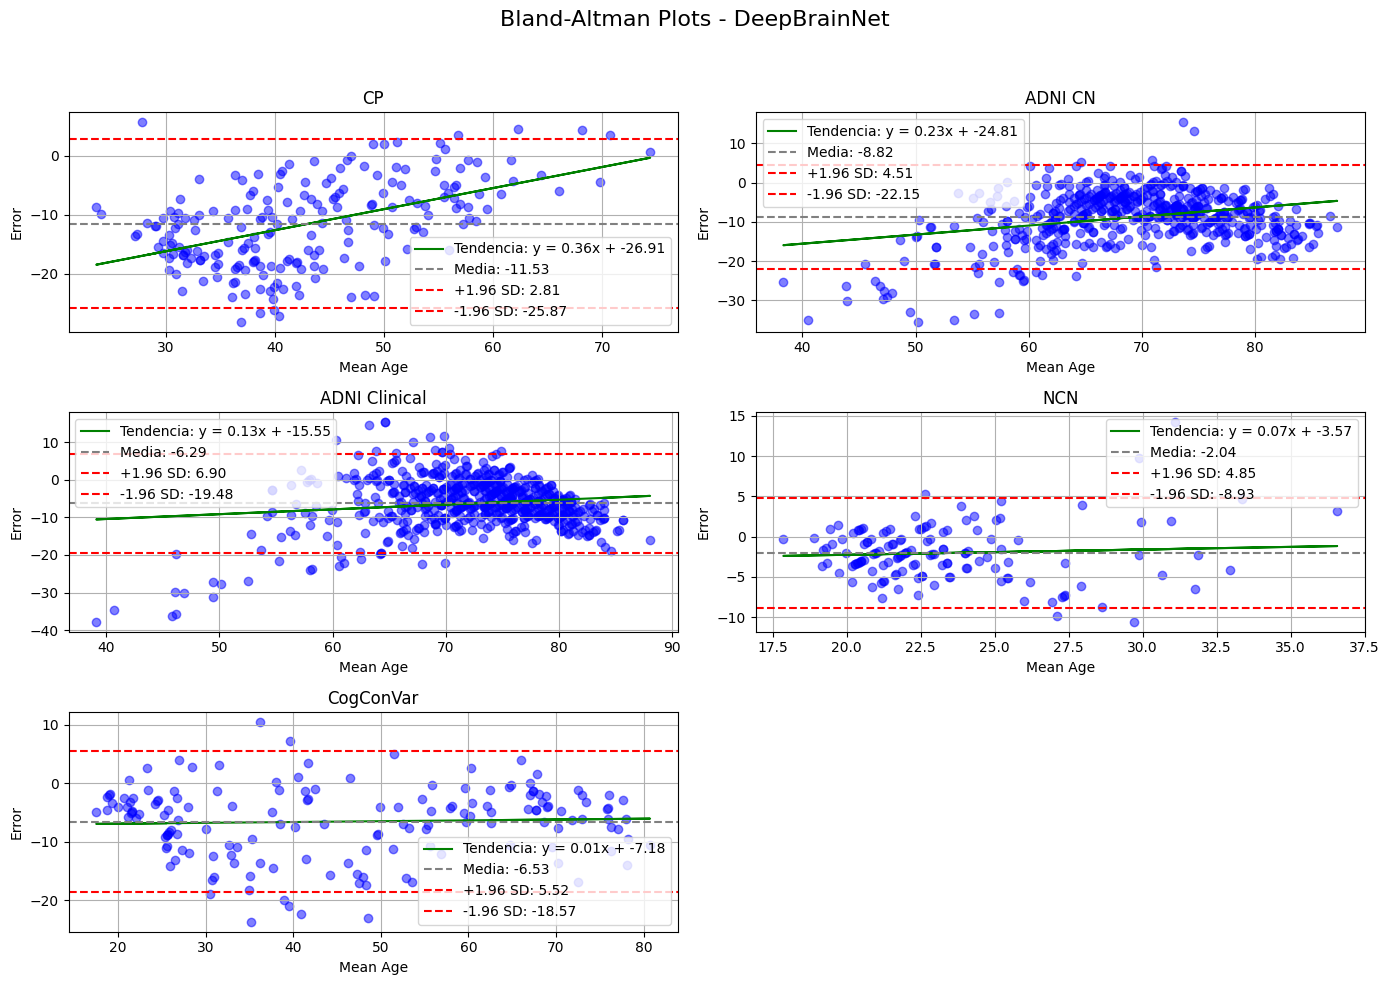

In [62]:
# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Bland-Altman Plots - DeepBrainNet', fontsize=16)

# --- Plot DBN_CP ---
axes[0][0].scatter(DBN_CP['mean'], DBN_CP['Error'], color='blue', alpha=0.5)
axes[0][0].plot(DBN_CP['mean'], tendencia_DBNCP, color='green', linestyle='-', label=f'Tendencia: y = {slope_DBNCP:.2f}x + {intercept_DBNCP:.2f}')
axes[0][0].axhline(mean_diff_DBNCP, color='gray', linestyle='--', label=f'Media: {mean_diff_DBNCP:.2f}')
axes[0][0].axhline(upper_limit_DBNCP, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_DBNCP:.2f}')
axes[0][0].axhline(lower_limit_DBNCP, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_DBNCP:.2f}')
axes[0][0].set_title('CP')
axes[0][0].set_xlabel('Mean Age')
axes[0][0].set_ylabel('Error')
axes[0][0].legend()
axes[0][0].grid(True)

# --- Plot DBN_ADNI CN ---
axes[0][1].scatter(DBN_ADNI[DBN_ADNI['Group']=='CN']['mean'], DBN_ADNI[DBN_ADNI['Group']=='CN']['Error'], color='blue', alpha=0.5)
axes[0][1].plot(DBN_ADNI[DBN_ADNI['Group']=='CN']['mean'], tendencia_DBNADNICN, color='green', linestyle='-', label=f'Tendencia: y = {slope_DBNADNICN:.2f}x + {intercept_DBNADNICN:.2f}')
axes[0][1].axhline(mean_diff_control_DBNADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_control_DBNADNI:.2f}')
axes[0][1].axhline(upper_limit_control_DBNADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_control_DBNADNI:.2f}')
axes[0][1].axhline(lower_limit_control_DBNADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_control_DBNADNI:.2f}')
axes[0][1].set_title('ADNI CN')
axes[0][1].set_xlabel('Mean Age')
axes[0][1].set_ylabel('Error')
axes[0][1].legend()
axes[0][1].grid(True)

# --- Plot DBN_ADNI cli ---
axes[1][0].scatter(DBN_ADNI[DBN_ADNI['Group']!='CN']['mean'], DBN_ADNI[DBN_ADNI['Group']!='CN']['Error'], color='blue', alpha=0.5)
axes[1][0].plot(DBN_ADNI[DBN_ADNI['Group']!='CN']['mean'], tendencia_DBNADNIcli, color='green', linestyle='-', label=f'Tendencia: y = {slope_DBNADNIcli:.2f}x + {intercept_DBNADNIcli:.2f}')
axes[1][0].axhline(mean_diff_clinical_DBNADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_clinical_DBNADNI:.2f}')
axes[1][0].axhline(upper_limit_clinical_DBNADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_clinical_DBNADNI:.2f}')
axes[1][0].axhline(lower_limit_clinical_DBNADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_clinical_DBNADNI:.2f}')
axes[1][0].set_title('ADNI Clinical')
axes[1][0].set_xlabel('Mean Age')
axes[1][0].set_ylabel('Error')
axes[1][0].legend()
axes[1][0].grid(True)

# --- Plot DBN_NCN ---
axes[1][1].scatter(DBN_NCN['mean'], DBN_NCN['Error'], color='blue', alpha=0.5)
axes[1][1].plot(DBN_NCN['mean'], tendencia_DBNNCN, color='green', linestyle='-', label=f'Tendencia: y = {slope_DBNNCN:.2f}x + {intercept_DBNNCN:.2f}')
axes[1][1].axhline(mean_diff_DBNNCN, color='gray', linestyle='--', label=f'Media: {mean_diff_DBNNCN:.2f}')
axes[1][1].axhline(upper_limit_DBNNCN, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_DBNNCN:.2f}')
axes[1][1].axhline(lower_limit_DBNNCN, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_DBNNCN:.2f}')
axes[1][1].set_title('NCN')
axes[1][1].set_xlabel('Mean Age')
axes[1][1].set_ylabel('Error')
axes[1][1].legend()
axes[1][1].grid(True)

# --- Plot DBN_CogConVar ---
axes[2][0].scatter(DBN_CogConVar['mean'], DBN_CogConVar['Error'], color='blue', alpha=0.5)
axes[2][0].plot(DBN_CogConVar['mean'], tendencia_DBNCogConVar, color='green', linestyle='-', label=f'Tendencia: y = {slope_DBNCogConVar:.2f}x + {intercept_DBNCogConVar:.2f}')
axes[2][0].axhline(mean_diff_DBNCogConVar, color='gray', linestyle='--', label=f'Media: {mean_diff_DBNCogConVar:.2f}')
axes[2][0].axhline(upper_limit_DBNCogConVar, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_DBNCogConVar:.2f}')
axes[2][0].axhline(lower_limit_DBNCogConVar, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_DBNCogConVar:.2f}')
axes[2][0].set_title('CogConVar')
axes[2][0].set_xlabel('Mean Age')
axes[2][0].set_ylabel('Error')
axes[2][0].legend()
axes[2][0].grid(True)

#eliminar el segundo subplot de la última fila
axes[2][1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título
plt.show()

pyment

In [63]:
#CP-----------------------------------------------------------------------
pyment_CP['mean']=pyment_CP['Edad']+pyment_CP['prediction']
pyment_CP['mean']=pyment_CP['mean']/2

mean_diff_pymentCP=np.mean(pyment_CP['Error'])
std_diff_pymentCP=np.std(pyment_CP['Error'])

#intervalo de confianza del 95%
upper_limit_pymentCP = mean_diff_pymentCP + 1.96 * std_diff_pymentCP
lower_limit_pymentCP = mean_diff_pymentCP - 1.96 * std_diff_pymentCP

#ADNI CN-----------------------------------------------------------------------
pyment_ADNI['mean']=pyment_ADNI['Age']+pyment_ADNI['prediction']
pyment_ADNI['mean']=pyment_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_pymentADNI=np.mean(pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'])
std_diff_control_pymentADNI=np.std(pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_pymentADNI = mean_diff_control_pymentADNI + 1.96 * std_diff_control_pymentADNI
lower_limit_control_pymentADNI = mean_diff_control_pymentADNI - 1.96 * std_diff_control_pymentADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_pymentADNI=np.mean(pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'])
std_diff_clinical_pymentADNI=np.std(pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_pymentADNI = mean_diff_clinical_pymentADNI + 1.96 * std_diff_clinical_pymentADNI
lower_limit_clinical_pymentADNI = mean_diff_clinical_pymentADNI - 1.96 * std_diff_clinical_pymentADNI

#NCN-----------------------------------------------------------------------
pyment_NCN['mean']=pyment_NCN['age']+pyment_NCN['prediction']
pyment_NCN['mean']=pyment_NCN['mean']/2

mean_diff_pymentNCN=np.mean(pyment_NCN['Error'])
std_diff_pymentNCN=np.std(pyment_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_pymentNCN = mean_diff_pymentNCN + 1.96 * std_diff_pymentNCN
lower_limit_pymentNCN = mean_diff_pymentNCN - 1.96 * std_diff_pymentNCN

#CogConVar-----------------------------------------------------------------------
pyment_CogConVar['mean']=pyment_CogConVar['age']+pyment_CogConVar['prediction']
pyment_CogConVar['mean']=pyment_CogConVar['mean']/2

mean_diff_pymentCogConVar=np.mean(pyment_CogConVar['Error'])
std_diff_pymentCogConVar=np.std(pyment_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_pymentCogConVar = mean_diff_pymentCogConVar + 1.96 * std_diff_pymentCogConVar
lower_limit_pymentCogConVar = mean_diff_pymentCogConVar - 1.96 * std_diff_pymentCogConVar

In [64]:
#eliminar nulos
pyment_CP = pyment_CP.dropna(subset=['Error', 'mean'])
pyment_ADNI = pyment_ADNI.dropna(subset=['Error', 'mean'])
pyment_NCN = pyment_NCN.dropna(subset=['Error', 'mean'])
pyment_CogConVar = pyment_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión pyment_CP
slope_pymentCP, intercept_pymentCP = np.polyfit(pyment_CP['mean'], pyment_CP['Error'], 1)
tendencia_pymentCP = slope_pymentCP * pyment_CP['mean'] + intercept_pymentCP

# Regressión pyment_ADNICN
slope_pymentADNICN, intercept_pymentADNICN = np.polyfit(pyment_ADNI[pyment_ADNI['Group']=='CN']['mean'], pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'], 1)
tendencia_pymentADNICN = slope_pymentADNICN * pyment_ADNI[pyment_ADNI['Group']=='CN']['mean'] + intercept_pymentADNICN

# Regressión pyment_ADNIcli
slope_pymentADNIcli, intercept_pymentADNIcli = np.polyfit(pyment_ADNI[pyment_ADNI['Group']!='CN']['mean'], pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'], 1)
tendencia_pymentADNIcli = slope_pymentADNIcli * pyment_ADNI[pyment_ADNI['Group']!='CN']['mean'] + intercept_pymentADNIcli

# Regressión pyment_NCN
slope_pymentNCN, intercept_pymentNCN = np.polyfit(pyment_NCN['mean'], pyment_NCN['Error'], 1)
tendencia_pymentNCN = slope_pymentNCN * pyment_NCN['mean'] + intercept_pymentNCN

# Regressión pyment_CogConVar
slope_pymentCogConVar, intercept_pymentCogConVar = np.polyfit(pyment_CogConVar['mean'], pyment_CogConVar['Error'], 1)
tendencia_pymentCogConVar = slope_pymentCogConVar * pyment_CogConVar['mean'] + intercept_pymentCogConVar

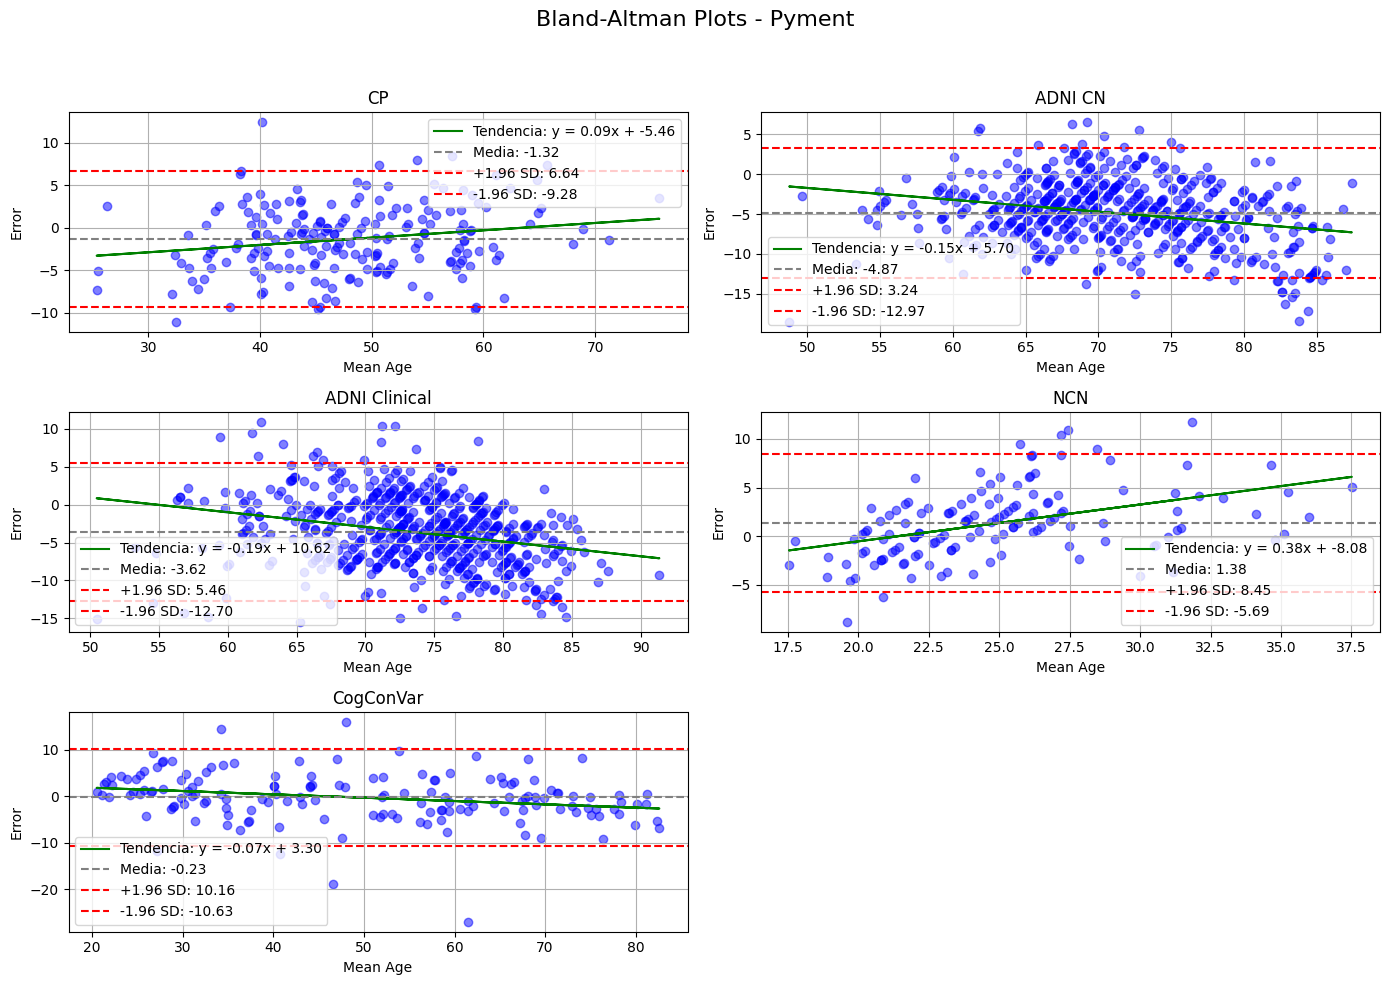

In [65]:
#crear subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Bland-Altman Plots - Pyment', fontsize=16)

# --- Plot pyment_CP ---
axes[0][0].scatter(pyment_CP['mean'], pyment_CP['Error'], color='blue', alpha=0.5)
axes[0][0].plot(pyment_CP['mean'], tendencia_pymentCP, color='green', linestyle='-', label=f'Tendencia: y = {slope_pymentCP:.2f}x + {intercept_pymentCP:.2f}')
axes[0][0].axhline(mean_diff_pymentCP, color='gray', linestyle='--', label=f'Media: {mean_diff_pymentCP:.2f}')
axes[0][0].axhline(upper_limit_pymentCP, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_pymentCP:.2f}')
axes[0][0].axhline(lower_limit_pymentCP, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_pymentCP:.2f}')
axes[0][0].set_title('CP')
axes[0][0].set_xlabel('Mean Age')
axes[0][0].set_ylabel('Error')
axes[0][0].legend()
axes[0][0].grid(True)

# --- Plot pyment_ADNI CN ---
axes[0][1].scatter(pyment_ADNI[pyment_ADNI['Group']=='CN']['mean'], pyment_ADNI[pyment_ADNI['Group']=='CN']['Error'], color='blue', alpha=0.5)
axes[0][1].plot(pyment_ADNI[pyment_ADNI['Group']=='CN']['mean'], tendencia_pymentADNICN, color='green', linestyle='-', label=f'Tendencia: y = {slope_pymentADNICN:.2f}x + {intercept_pymentADNICN:.2f}')
axes[0][1].axhline(mean_diff_control_pymentADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_control_pymentADNI:.2f}')
axes[0][1].axhline(upper_limit_control_pymentADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_control_pymentADNI:.2f}')
axes[0][1].axhline(lower_limit_control_pymentADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_control_pymentADNI:.2f}')
axes[0][1].set_title('ADNI CN')
axes[0][1].set_xlabel('Mean Age')
axes[0][1].set_ylabel('Error')
axes[0][1].legend()
axes[0][1].grid(True)

# --- Plot pyment_ADNI cli ---
axes[1][0].scatter(pyment_ADNI[pyment_ADNI['Group']!='CN']['mean'], pyment_ADNI[pyment_ADNI['Group']!='CN']['Error'], color='blue', alpha=0.5)
axes[1][0].plot(pyment_ADNI[pyment_ADNI['Group']!='CN']['mean'], tendencia_pymentADNIcli, color='green', linestyle='-', label=f'Tendencia: y = {slope_pymentADNIcli:.2f}x + {intercept_pymentADNIcli:.2f}')
axes[1][0].axhline(mean_diff_clinical_pymentADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_clinical_pymentADNI:.2f}')
axes[1][0].axhline(upper_limit_clinical_pymentADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_clinical_pymentADNI:.2f}')
axes[1][0].axhline(lower_limit_clinical_pymentADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_clinical_pymentADNI:.2f}')
axes[1][0].set_title('ADNI Clinical')
axes[1][0].set_xlabel('Mean Age')
axes[1][0].set_ylabel('Error')
axes[1][0].legend()
axes[1][0].grid(True)

# --- Plot pyment_NCN ---
axes[1][1].scatter(pyment_NCN['mean'], pyment_NCN['Error'], color='blue', alpha=0.5)
axes[1][1].plot(pyment_NCN['mean'], tendencia_pymentNCN, color='green', linestyle='-', label=f'Tendencia: y = {slope_pymentNCN:.2f}x + {intercept_pymentNCN:.2f}')
axes[1][1].axhline(mean_diff_pymentNCN, color='gray', linestyle='--', label=f'Media: {mean_diff_pymentNCN:.2f}')
axes[1][1].axhline(upper_limit_pymentNCN, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_pymentNCN:.2f}')
axes[1][1].axhline(lower_limit_pymentNCN, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_pymentNCN:.2f}')
axes[1][1].set_title('NCN')
axes[1][1].set_xlabel('Mean Age')
axes[1][1].set_ylabel('Error')
axes[1][1].legend()
axes[1][1].grid(True)

# --- Plot pyment_CogConVar ---
axes[2][0].scatter(pyment_CogConVar['mean'], pyment_CogConVar['Error'], color='blue', alpha=0.5)
axes[2][0].plot(pyment_CogConVar['mean'], tendencia_pymentCogConVar, color='green', linestyle='-', label=f'Tendencia: y = {slope_pymentCogConVar:.2f}x + {intercept_pymentCogConVar:.2f}')
axes[2][0].axhline(mean_diff_pymentCogConVar, color='gray', linestyle='--', label=f'Media: {mean_diff_pymentCogConVar:.2f}')
axes[2][0].axhline(upper_limit_pymentCogConVar, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_pymentCogConVar:.2f}')
axes[2][0].axhline(lower_limit_pymentCogConVar, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_pymentCogConVar:.2f}')
axes[2][0].set_title('CogConVar')
axes[2][0].set_xlabel('Mean Age')
axes[2][0].set_ylabel('Error')
axes[2][0].legend()
axes[2][0].grid(True)

#eliminar el segundo subplot de la última fila
axes[2][1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título
plt.show()

ENIGMA

In [70]:
#CP-----------------------------------------------------------------------
ENIGMA_CP['mean']=ENIGMA_CP['Edad']+ENIGMA_CP['age_prediction']
ENIGMA_CP['mean']=ENIGMA_CP['mean']/2
mean_diff_ENIGMACP=np.mean(ENIGMA_CP['Error'])
std_diff_ENIGMACP=np.std(ENIGMA_CP['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMACP = mean_diff_ENIGMACP + 1.96 * std_diff_ENIGMACP
lower_limit_ENIGMACP = mean_diff_ENIGMACP - 1.96 * std_diff_ENIGMACP

#ADNI CN-----------------------------------------------------------------------
ENIGMA_ADNI['mean']=ENIGMA_ADNI['Age']+ENIGMA_ADNI['prediction']
ENIGMA_ADNI['mean']=ENIGMA_ADNI['mean']/2

#media y desviación estándar de las diferencias
mean_diff_control_ENIGMAADNI=np.mean(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'])
std_diff_control_ENIGMAADNI=np.std(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_control_ENIGMAADNI = mean_diff_control_ENIGMAADNI + 1.96 * std_diff_control_ENIGMAADNI
lower_limit_control_ENIGMAADNI = mean_diff_control_ENIGMAADNI - 1.96 * std_diff_control_ENIGMAADNI

#ADNI clinical-----------------------------------------------------------------------
#media y desviación estándar de las diferencias
mean_diff_clinical_ENIGMAADNI=np.mean(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'])
std_diff_clinical_ENIGMAADNI=np.std(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'])

#intervalo de confianza del 95%
upper_limit_clinical_ENIGMAADNI = mean_diff_clinical_ENIGMAADNI + 1.96 * std_diff_clinical_ENIGMAADNI
lower_limit_clinical_ENIGMAADNI = mean_diff_clinical_ENIGMAADNI - 1.96 * std_diff_clinical_ENIGMAADNI

#NCN-----------------------------------------------------------------------
ENIGMA_NCN['mean']=ENIGMA_NCN['age']+ENIGMA_NCN['prediction']
ENIGMA_NCN['mean']=ENIGMA_NCN['mean']/2

mean_diff_ENIGMANCN=np.mean(ENIGMA_NCN['Error'])
std_diff_ENIGMANCN=np.std(ENIGMA_NCN['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMANCN = mean_diff_ENIGMANCN + 1.96 * std_diff_ENIGMANCN
lower_limit_ENIGMANCN = mean_diff_ENIGMANCN - 1.96 * std_diff_ENIGMANCN
'''
#CogConVar-----------------------------------------------------------------------
ENIGMA_CogConVar['mean']=ENIGMA_CogConVar['age']+ENIGMA_CogConVar['prediction']
ENIGMA_CogConVar['mean']=ENIGMA_CogConVar['mean']/2

mean_diff_ENIGMACogConVar=np.mean(ENIGMA_CogConVar['Error'])
std_diff_ENIGMACogConVar=np.std(ENIGMA_CogConVar['Error'])

#intervalo de confianza del 95%
upper_limit_ENIGMACogConVar = mean_diff_ENIGMACogConVar + 1.96 * std_diff_ENIGMACogConVar
lower_limit_ENIGMACogConVar = mean_diff_ENIGMACogConVar - 1.96 * std_diff_ENIGMACogConVar  
''' 


"\n#CogConVar-----------------------------------------------------------------------\nENIGMA_CogConVar['mean']=ENIGMA_CogConVar['age']+ENIGMA_CogConVar['prediction']\nENIGMA_CogConVar['mean']=ENIGMA_CogConVar['mean']/2\n\nmean_diff_ENIGMACogConVar=np.mean(ENIGMA_CogConVar['Error'])\nstd_diff_ENIGMACogConVar=np.std(ENIGMA_CogConVar['Error'])\n\n#intervalo de confianza del 95%\nupper_limit_ENIGMACogConVar = mean_diff_ENIGMACogConVar + 1.96 * std_diff_ENIGMACogConVar\nlower_limit_ENIGMACogConVar = mean_diff_ENIGMACogConVar - 1.96 * std_diff_ENIGMACogConVar  \n"

In [71]:
#eliminar nulos
ENIGMA_CP = ENIGMA_CP.dropna(subset=['Error', 'mean'])
ENIGMA_ADNI = ENIGMA_ADNI.dropna(subset=['Error', 'mean'])
#ENIGMA_NCN = ENIGMA_NCN.dropna(subset=['Error', 'mean'])
#ENIGMA_CogConVar = ENIGMA_CogConVar.dropna(subset=['Error', 'mean'])

# Regressión ENIGMA_CP
slope_ENIGMACP, intercept_ENIGMACP = np.polyfit(ENIGMA_CP['mean'], ENIGMA_CP['Error'], 1)
tendencia_ENIGMACP = slope_ENIGMACP * ENIGMA_CP['mean'] + intercept_ENIGMACP

# Regressión ENIGMA_ADNICN
slope_ENIGMAADNICN, intercept_ENIGMAADNICN = np.polyfit(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['mean'], ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'], 1)
tendencia_ENIGMAADNICN = slope_ENIGMAADNICN * ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['mean'] + intercept_ENIGMAADNICN

# Regressión ENIGMA_ADNIcli
slope_ENIGMAADNIcli, intercept_ENIGMAADNIcli = np.polyfit(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['mean'], ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'], 1)
tendencia_ENIGMAADNIcli = slope_ENIGMAADNIcli * ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['mean'] + intercept_ENIGMAADNIcli

# Regressión ENIGMA_NCN
slope_ENIGMANCN, intercept_ENIGMANCN = np.polyfit(ENIGMA_NCN['mean'], ENIGMA_NCN['Error'], 1)
tendencia_ENIGMANCN = slope_ENIGMANCN * ENIGMA_NCN['mean'] + intercept_ENIGMANCN
'''
# Regressión ENIGMA_CogConVar
slope_ENIGMACogConVar, intercept_ENIGMACogConVar = np.polyfit(ENIGMA_CogConVar['mean'], ENIGMA_CogConVar['Error'], 1)
tendencia_ENIGMACogConVar = slope_ENIGMACogConVar * ENIGMA_CogConVar['mean'] + intercept_ENIGMACogConVar
''' 

"\n# Regressión ENIGMA_CogConVar\nslope_ENIGMACogConVar, intercept_ENIGMACogConVar = np.polyfit(ENIGMA_CogConVar['mean'], ENIGMA_CogConVar['Error'], 1)\ntendencia_ENIGMACogConVar = slope_ENIGMACogConVar * ENIGMA_CogConVar['mean'] + intercept_ENIGMACogConVar\n"

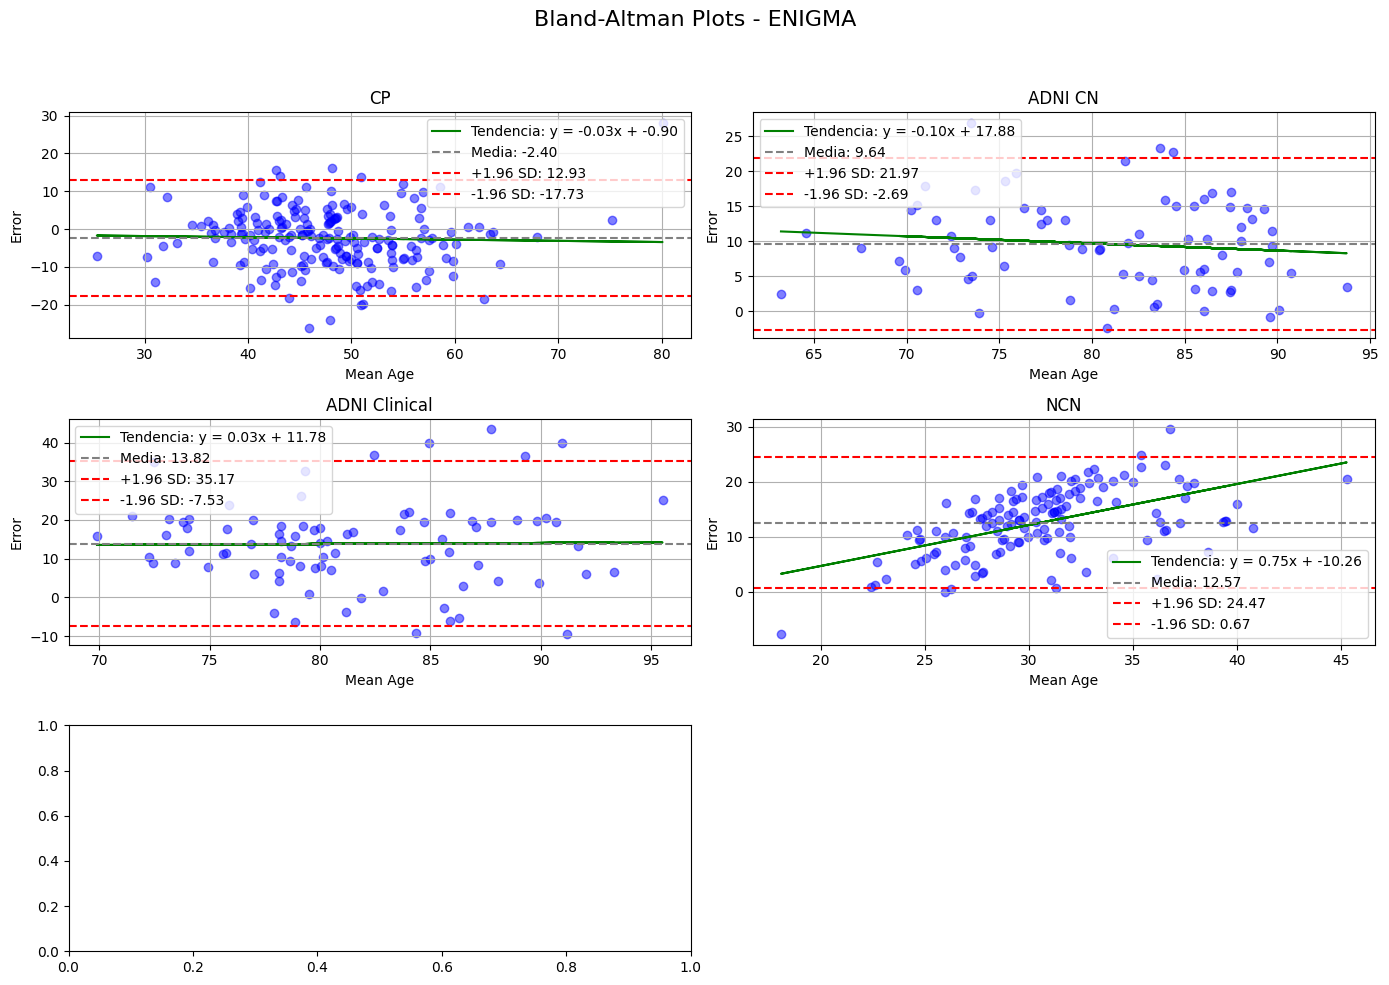

In [72]:
#crear subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Bland-Altman Plots - ENIGMA', fontsize=16)

# --- Plot ENIGMA_CP ---
axes[0][0].scatter(ENIGMA_CP['mean'], ENIGMA_CP['Error'], color='blue', alpha=0.5)
axes[0][0].plot(ENIGMA_CP['mean'], tendencia_ENIGMACP, color='green', linestyle='-', label=f'Tendencia: y = {slope_ENIGMACP:.2f}x + {intercept_ENIGMACP:.2f}')
axes[0][0].axhline(mean_diff_ENIGMACP, color='gray', linestyle='--', label=f'Media: {mean_diff_ENIGMACP:.2f}')
axes[0][0].axhline(upper_limit_ENIGMACP, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_ENIGMACP:.2f}')
axes[0][0].axhline(lower_limit_ENIGMACP, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_ENIGMACP:.2f}')
axes[0][0].set_title('CP')
axes[0][0].set_xlabel('Mean Age')
axes[0][0].set_ylabel('Error')
axes[0][0].legend()
axes[0][0].grid(True)

# --- Plot ENIGMA_ADNI CN ---
axes[0][1].scatter(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['mean'], ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['Error'], color='blue', alpha=0.5)
axes[0][1].plot(ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']['mean'], tendencia_ENIGMAADNICN, color='green', linestyle='-', label=f'Tendencia: y = {slope_ENIGMAADNICN:.2f}x + {intercept_ENIGMAADNICN:.2f}')
axes[0][1].axhline(mean_diff_control_ENIGMAADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_control_ENIGMAADNI:.2f}')
axes[0][1].axhline(upper_limit_control_ENIGMAADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_control_ENIGMAADNI:.2f}')
axes[0][1].axhline(lower_limit_control_ENIGMAADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_control_ENIGMAADNI:.2f}')
axes[0][1].set_title('ADNI CN')
axes[0][1].set_xlabel('Mean Age')
axes[0][1].set_ylabel('Error')
axes[0][1].legend()
axes[0][1].grid(True)

# --- Plot ENIGMA_ADNI cli ---
axes[1][0].scatter(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['mean'], ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['Error'], color='blue', alpha=0.5)
axes[1][0].plot(ENIGMA_ADNI[ENIGMA_ADNI['Group']!='CN']['mean'], tendencia_ENIGMAADNIcli, color='green', linestyle='-', label=f'Tendencia: y = {slope_ENIGMAADNIcli:.2f}x + {intercept_ENIGMAADNIcli:.2f}')
axes[1][0].axhline(mean_diff_clinical_ENIGMAADNI, color='gray', linestyle='--', label=f'Media: {mean_diff_clinical_ENIGMAADNI:.2f}')
axes[1][0].axhline(upper_limit_clinical_ENIGMAADNI, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_clinical_ENIGMAADNI:.2f}')
axes[1][0].axhline(lower_limit_clinical_ENIGMAADNI, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_clinical_ENIGMAADNI:.2f}')
axes[1][0].set_title('ADNI Clinical')
axes[1][0].set_xlabel('Mean Age')
axes[1][0].set_ylabel('Error')
axes[1][0].legend()
axes[1][0].grid(True)


#--- Plot ENIGMA_NCN ---
axes[1][1].scatter(ENIGMA_NCN['mean'], ENIGMA_NCN['Error'], color='blue', alpha=0.5)
axes[1][1].plot(ENIGMA_NCN['mean'], tendencia_ENIGMANCN, color='green', linestyle='-', label=f'Tendencia: y = {slope_ENIGMANCN:.2f}x + {intercept_ENIGMANCN:.2f}')
axes[1][1].axhline(mean_diff_ENIGMANCN, color='gray', linestyle='--', label=f'Media: {mean_diff_ENIGMANCN:.2f}')
axes[1][1].axhline(upper_limit_ENIGMANCN, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_ENIGMANCN:.2f}')
axes[1][1].axhline(lower_limit_ENIGMANCN, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_ENIGMANCN:.2f}')
axes[1][1].set_title('NCN')
axes[1][1].set_xlabel('Mean Age')
axes[1][1].set_ylabel('Error')
axes[1][1].legend()
axes[1][1].grid(True)
'''
# --- Plot pyment_CogConVar ---
axes[2][0].scatter(ENIGMA_CogConVar['mean'], ENIMGA_CogConVar['Error'], color='blue', alpha=0.5)
axes[2][0].plot(ENIGMA_CogConVar['mean'], tendencia_ENIGMACogConVar, color='green', linestyle='-', label=f'Tendencia: y = {slope_ENIGMACogConVar:.2f}x + {intercept_ENIGMACogConVar:.2f}')
axes[2][0].axhline(mean_diff_ENIGMACogConVar, color='gray', linestyle='--', label=f'Media: {mean_diff_ENIGMACogConVar:.2f}')
axes[2][0].axhline(upper_limit_ENIGMACogConVar, color='red', linestyle='--', label=f'+1.96 SD: {upper_limit_ENIMGACogConVar:.2f}')
axes[2][0].axhline(lower_limit_ENIGMACogConVar, color='red', linestyle='--', label=f'-1.96 SD: {lower_limit_ENIGMACogConVar:.2f}')
axes[2][0].set_title('CogConVar')
axes[2][0].set_xlabel('Mean Age')
axes[2][0].set_ylabel('Error')
axes[2][0].legend()
axes[2][0].grid(True)
'''
#eliminar el segundo subplot de la última fila
axes[2][1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el título
plt.show()
